In [1]:
from matplotlib import pyplot as plt
import os
import json
import numpy as np

In [19]:
# Path of the statistics of the final model
o_s_path = os.path.join("..", "..","output_analysis","stats_values_after_epoch_5.json")

In [20]:
with open(o_s_path, 'r') as stats_file:
    stats = json.load(stats_file)

In [21]:
def plot_loss_accuracy(
            steps: int,
            ax: any,
            stats: dict
    ):
        """
        The method plots the trend of the loss and f1 score

        Parameters
        ----------
        steps: int
            The number of steps
        ax: any
            The axes of the matplotlib figure
        stats: dict
            The dictionary of the statistics
        """

        titles = ['Loss', 'Accuracy', 'F1 Score', 'Precision', 'Recall']
        attributes = ['loss', 'accuracy', 'f1_score', 'precision', 'recall']

        for i in range(len(titles)):
            title = titles[i]
            ax[i].set_title(title, fontsize=10)
            ax[i].set_xlabel("steps", fontsize=10)
            ax[i].set_ylabel(attributes[i], fontsize=10)

            if isinstance(stats[f"t_{attributes[i]}"][0], float):
                ax[i].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(stats[f"t_{attributes[i]}"])[:], '-', label=f"t-{attributes[i]}")
                ax[i].plot(range(0, len(stats[f"v_{attributes[i]}"]) * steps, steps), np.array(stats[f"v_{attributes[i]}"])[:], '-', label=f"v-{attributes[i]}")
            else:
                plots = {k: []  for k,_ in stats[f"t_{attributes[i]}"][0]}
                for tuple in stats[f"t_{attributes[i]}"]:
                    for k, v in tuple:
                        plots[k].append(v)
                for k, v in plots.items():
                    ax[i].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(v)[:], '-', label=f"t_{k}")

                plots = {k: []  for k,_ in stats[f"v_{attributes[i]}"][0]}
                for tuple in stats[f"v_{attributes[i]}"]:
                    for k, v in tuple:
                        plots[k].append(v)
                for k, v in plots.items():
                    ax[i].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(v)[:], '-', label=f"v_{k}")

            ax[i].legend()

In [22]:
def plot_f1_score(
            steps: int,
            ax: any,
            stats: dict
    ):
        """
        The method plots the trend of the loss and f1 score

        Parameters
        ----------
        steps: int
            The number of steps
        ax: any
            The axes of the matplotlib figure
        stats: dict
            The dictionary of the statistics
        """

        titles = ['F1 Score', 'Precision', 'Recall']
        attributes = ['f1_score', 'precision', 'recall']

        for i in range(len(titles)):
            plots = {k: {}  for k,_ in stats[f"t_{attributes[i]}"][0]}

            for k, v in plots.items():
                v["t"] = []
                v["v"] = []

            for tuple in stats[f"t_{attributes[i]}"]:
                for j, k_v in enumerate(tuple):
                    plots[k_v[0]]["t"].append(k_v[1])

            for tuple in stats[f"v_{attributes[i]}"]:
                for j, k_v in enumerate(tuple):
                    plots[k_v[0]]["v"].append(k_v[1])

            for j, k_v in enumerate(plots.items()):
                t_v_dict = k_v[1]
                title = titles[i]
                ax[i][j].set_title(f"{k_v[0]} - {title}", fontsize=10)
                ax[i][j].set_xlabel("steps", fontsize=10)
                ax[i][j].set_ylabel(attributes[i], fontsize=10)
                ax[i][j].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(t_v_dict['t'])[:], '-', label=f"t_{k}")
                ax[i][j].plot(range(0, len(stats[f"v_{attributes[i]}"]) * steps, steps), np.array(t_v_dict['v'])[:], '-', label=f"v_{k}")

                """plots = {k: []  for k,_ in stats[f"v_{attributes[i]}"][0]}
                for tuple in stats[f"v_{attributes[i]}"]:
                    for k, v in tuple:
                        plots[k].append(v)
                for k, v in plots.items():
                    ax[i][j].plot(range(0, len(stats[f"t_{attributes[i]}"]) * steps, steps), np.array(v)[:], '-', label=f"v_{k}")"""

                ax[i][j].legend()

IndexError: index 2 is out of bounds for axis 0 with size 2

<Figure size 640x480 with 0 Axes>

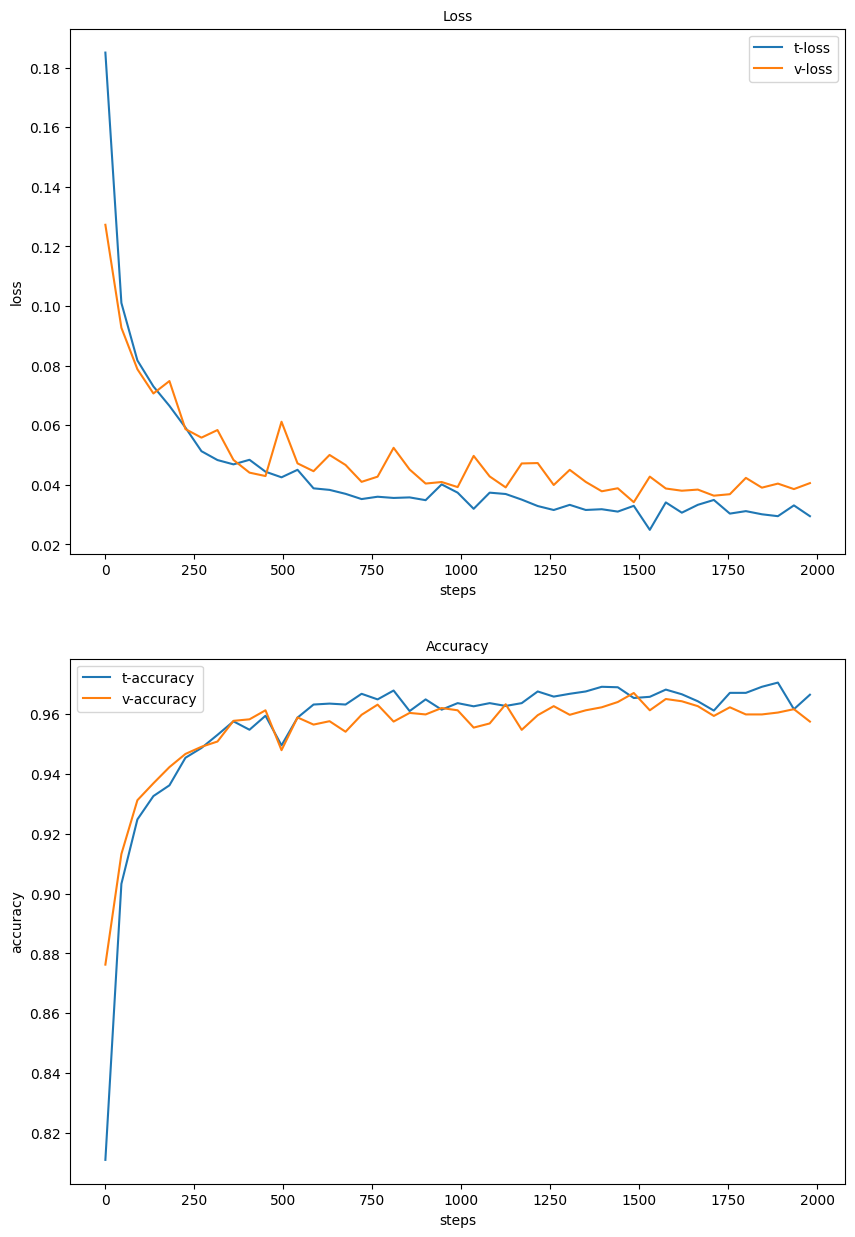

In [23]:
# Plot training loss and perplexity
plt.clf()

fig, ax = plt.subplots(2,1, figsize=(10,15))
plot_loss_accuracy(len(stats['t_loss']),ax,stats)

plt.subplots_adjust(hspace=0.3)
plt.show()

<Figure size 640x480 with 0 Axes>

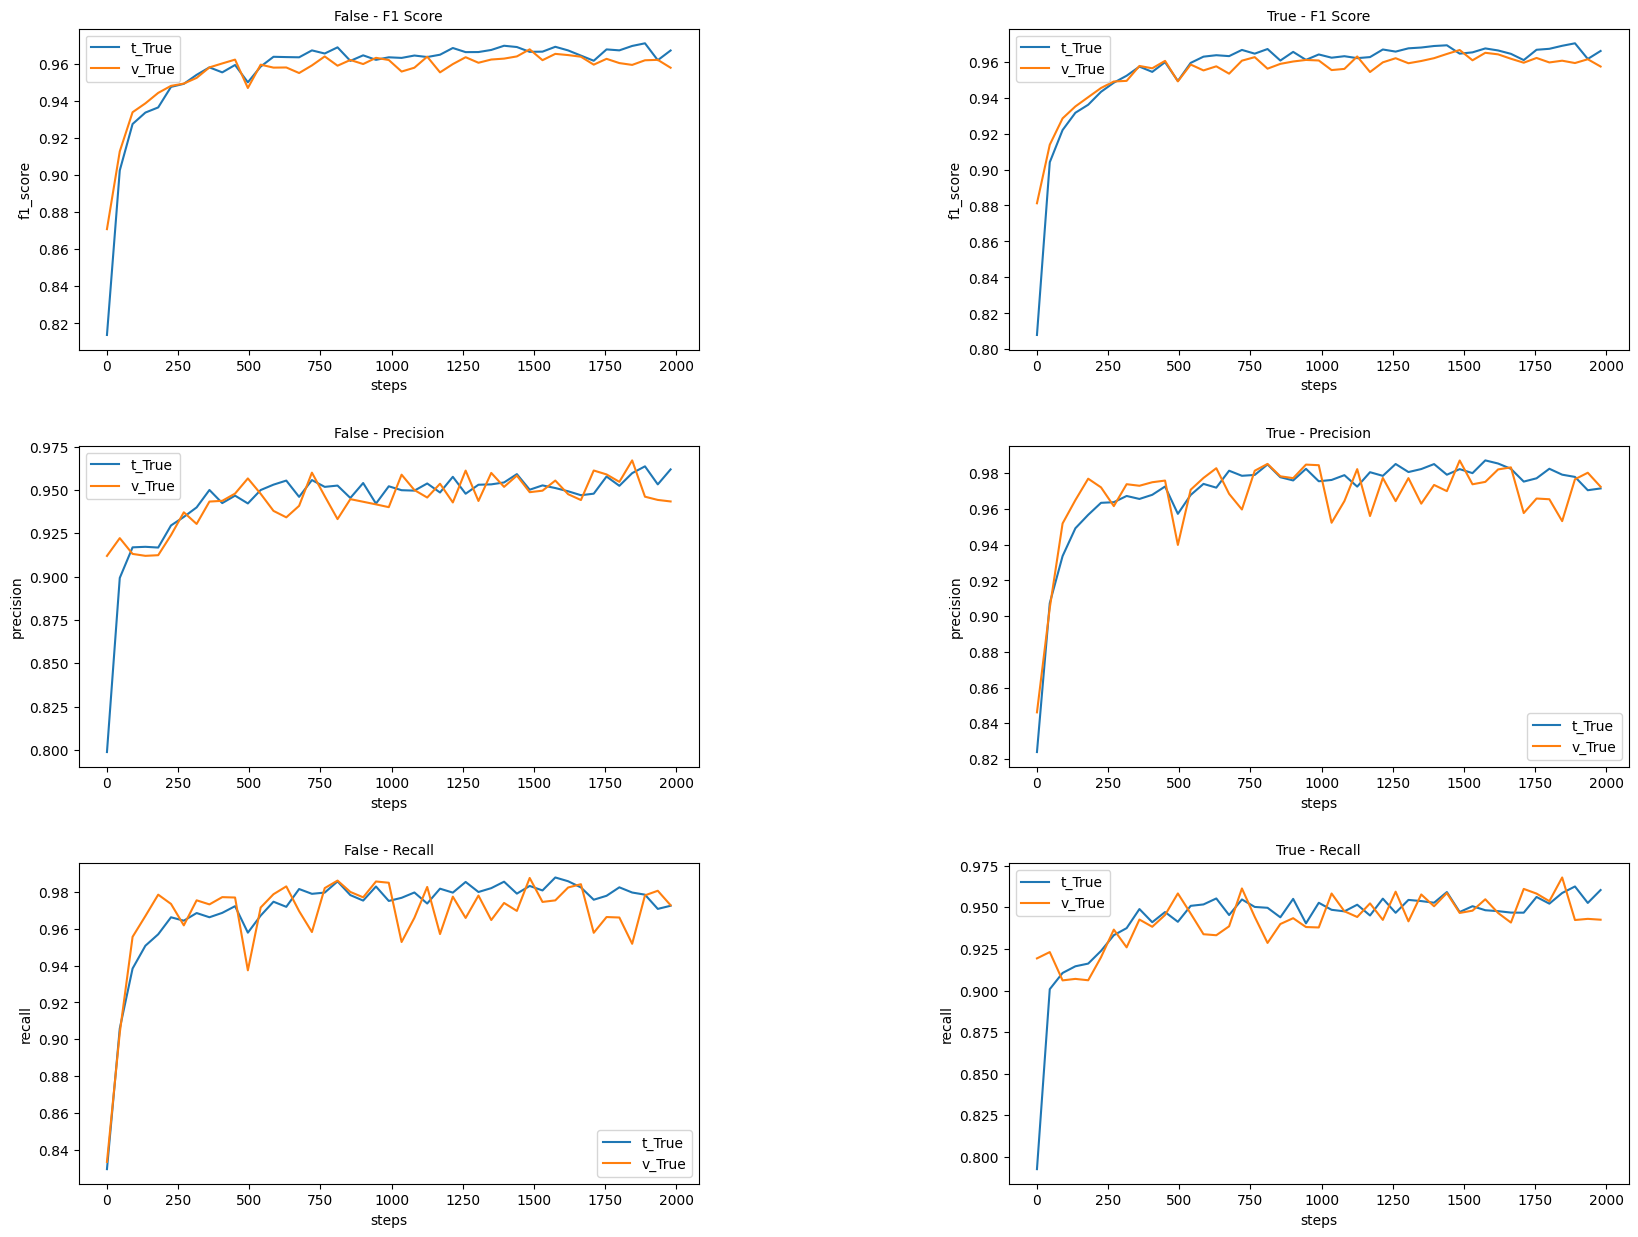

In [24]:
plt.clf()

fig, ax = plt.subplots(3,len(stats["t_f1_score"][0]), figsize=(20,15))
plot_f1_score(len(stats['t_loss']),ax,stats)

plt.subplots_adjust(hspace=0.3,wspace=0.5)
plt.show()

In [25]:
len(stats["t_f1_score"][0])

2

In [24]:
[ true_el[1] for false_el, true_el in stats["v_f1_score"]]

[0.6687255668491009,
 0.8255385974382882,
 0.8615608892591242,
 0.8774533017626939,
 0.8720954574000418,
 0.8771800798487077,
 0.8750708945604537,
 0.8933778696781719,
 0.894107779408681,
 0.886323268206039,
 0.8920093259855872,
 0.8983571807101219,
 0.8985274431057564,
 0.898566231542906,
 0.8993159469858913,
 0.8982987969685728,
 0.9013616382545299,
 0.9035989717223651,
 0.8991547498803891,
 0.9037068372904659,
 0.9032845737555592,
 0.9065131649077923,
 0.9001006942604273,
 0.9085346215780998,
 0.9046730963926041,
 0.9043739279588336,
 0.9065807144775718,
 0.9030930068793673,
 0.9058518678471174,
 0.91155735953856,
 0.9046371075573622,
 0.904270671869154,
 0.9064476030913905,
 0.9067651466495397,
 0.9047065044949761,
 0.9052755863253368,
 0.9076292219704327,
 0.9052846841028951,
 0.9037539721010396,
 0.9063884985406984,
 0.9083176312247645,
 0.9078926388519799,
 0.9087805398485009,
 0.9063786558306154,
 0.9126109169131488,
 0.9070078698003106,
 0.9088683061854572]

In [25]:
stats["v_f1_score"]

[[['False', 0.0], ['True', 0.6687255668491009]],
 [['False', 0.7400745777582803], ['True', 0.8255385974382882]],
 [['False', 0.8209065804539637], ['True', 0.8615608892591242]],
 [['False', 0.8452388863047379], ['True', 0.8774533017626939]],
 [['False', 0.8364779874213836], ['True', 0.8720954574000418]],
 [['False', 0.844320149154348], ['True', 0.8771800798487077]],
 [['False', 0.8347090524592401], ['True', 0.8750708945604537]],
 [['False', 0.8676364115052986], ['True', 0.8933778696781719]],
 [['False', 0.8651355321137668], ['True', 0.894107779408681]],
 [['False', 0.8540772532188842], ['True', 0.886323268206039]],
 [['False', 0.8657620866815967], ['True', 0.8920093259855872]],
 [['False', 0.8736828240252897], ['True', 0.8983571807101219]],
 [['False', 0.8767800247090187], ['True', 0.8985274431057564]],
 [['False', 0.8765785704986331], ['True', 0.898566231542906]],
 [['False', 0.8771998435666797], ['True', 0.8993159469858913]],
 [['False', 0.8736252881132696], ['True', 0.898298796968572